In [3]:

import pandas as pd

# URL do dataset Wine
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'

# Nome das colunas em português BR
column_names_pt_br = [
    'classe',
    'alcool',
    'acido_malico',
    'cinzas',
    'alcalinidade_de_cinzas',
    'magnesio',
    'fenois_totais',
    'flavanoides',
    'fenois_nao_flavanoides',
    'proantocianinas',
    'intensidade_de_cor',
    'matiz',
    'od280_od315_de_vinhos_diluidos',
    'prolina'
]

# Ler o arquivo CSV com as colunas especificadas, definindo a coluna 'classe' como object
vinhos = pd.read_csv(url, names=column_names_pt_br, dtype={'classe': object})

# Exibir as primeiras linhas para ver se os dados foram carregados corretamente
vinhos.head()


,classe,alcool,acido_malico,cinzas,alcalinidade_de_cinzas,magnesio,fenois_totais,flavanoides,fenois_nao_flavanoides,proantocianinas,intensidade_de_cor,matiz,od280_od315_de_vinhos_diluidos,prolina
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## Tarefa 1: Análise Exploratória de Variáveis

In [4]:

# Estatísticas descritivas das colunas solicitadas
estatisticas = vinhos[['alcool', 'acido_malico', 'magnesio', 'matiz']].describe()
print(estatisticas)

# Contagem de valores únicos na coluna 'classe'
contagem_classes = vinhos['classe'].value_counts()
print(f"Contagem de classes:\n{contagem_classes}")


           alcool  acido_malico    magnesio       matiz
count  178.000000    178.000000  178.000000  178.000000
mean    13.000618      2.336348   99.741573    0.957449
std      0.811827      1.117146   14.282484    0.228572
min     11.030000      0.740000   70.000000    0.480000
25%     12.362500      1.602500   88.000000    0.782500
50%     13.050000      1.865000   98.000000    0.965000
75%     13.677500      3.082500  107.000000    1.120000
max     14.830000      5.800000  162.000000    1.710000
Contagem de classes:
classe
2    71
1    59
3    48
Name: count, dtype: int64


## Tarefa 2: Criação de Boxplots

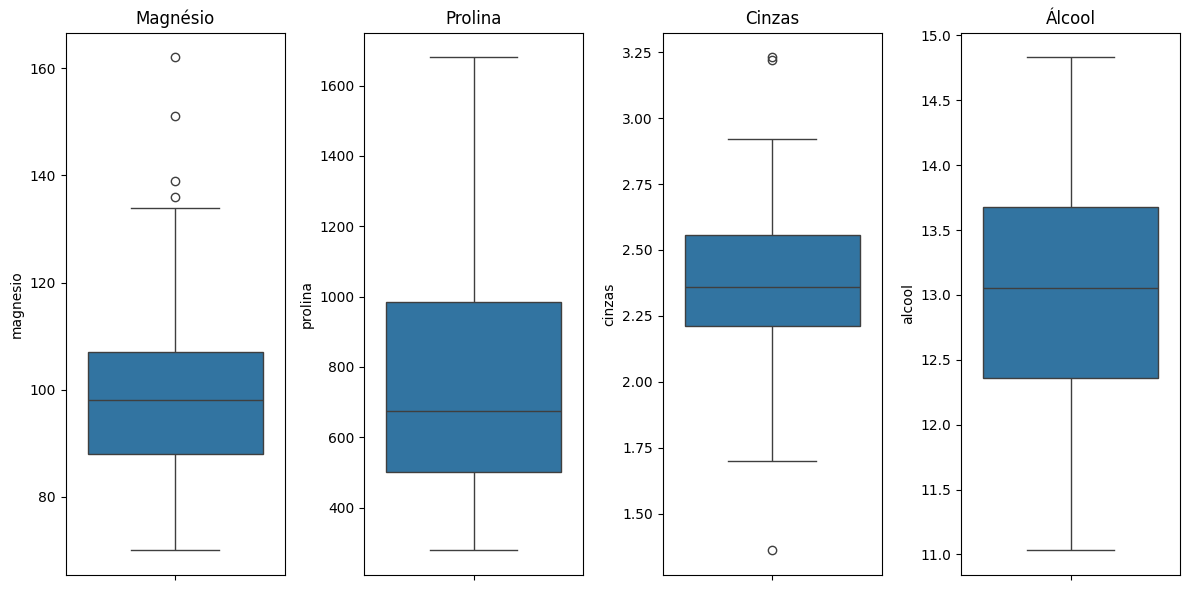

In [5]:

import seaborn as sns
import matplotlib.pyplot as plt

# Criando os boxplots
plt.figure(figsize=(12, 6))

# Boxplot para magnésio
plt.subplot(1, 4, 1)
sns.boxplot(y=vinhos['magnesio'])
plt.title('Magnésio')

# Boxplot para prolina
plt.subplot(1, 4, 2)
sns.boxplot(y=vinhos['prolina'])
plt.title('Prolina')

# Boxplot para cinzas
plt.subplot(1, 4, 3)
sns.boxplot(y=vinhos['cinzas'])
plt.title('Cinzas')

# Boxplot para álcool
plt.subplot(1, 4, 4)
sns.boxplot(y=vinhos['alcool'])
plt.title('Álcool')

plt.tight_layout()
plt.show()


## Tarefa 3: Boxplots Segregados por Classe

<ipython-input-6-bafa431c71f8>:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 2)
<ipython-input-6-bafa431c71f8>:17: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 3)
<ipython-input-6-bafa431c71f8>:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 4)


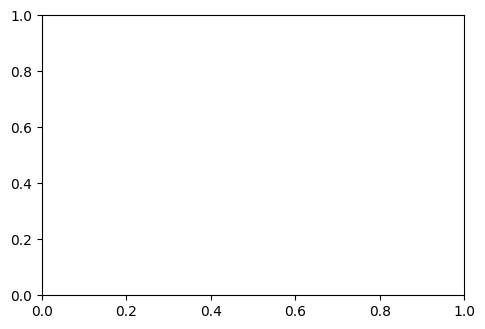

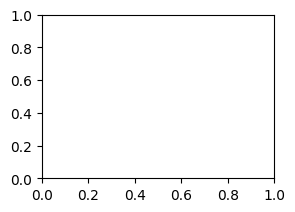

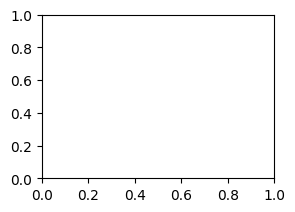

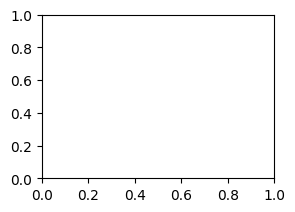

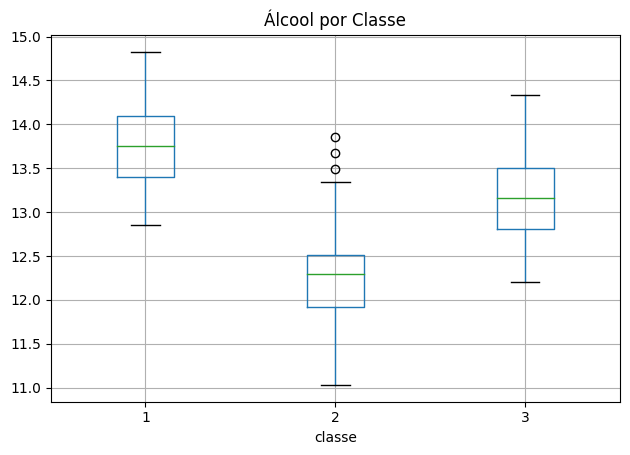

In [6]:

# Boxplots segregados por classe
plt.figure(figsize=(12, 8))

# Boxplot para magnésio por classe
plt.subplot(2, 2, 1)
vinhos.boxplot(column='magnesio', by='classe')
plt.title('Magnésio por Classe')
plt.suptitle('')

# Boxplot para fenois_totais por classe
plt.subplot(2, 2, 2)
vinhos.boxplot(column='fenois_totais', by='classe')
plt.title('Fenois Totais por Classe')
plt.suptitle('')

# Boxplot para ácido málico por classe
plt.subplot(2, 2, 3)
vinhos.boxplot(column='acido_malico', by='classe')
plt.title('Ácido Málico por Classe')
plt.suptitle('')

# Boxplot para álcool por classe
plt.subplot(2, 2, 4)
vinhos.boxplot(column='alcool', by='classe')
plt.title('Álcool por Classe')
plt.suptitle('')

plt.tight_layout()
plt.show()


## Tarefa 4: Criação de Histograma

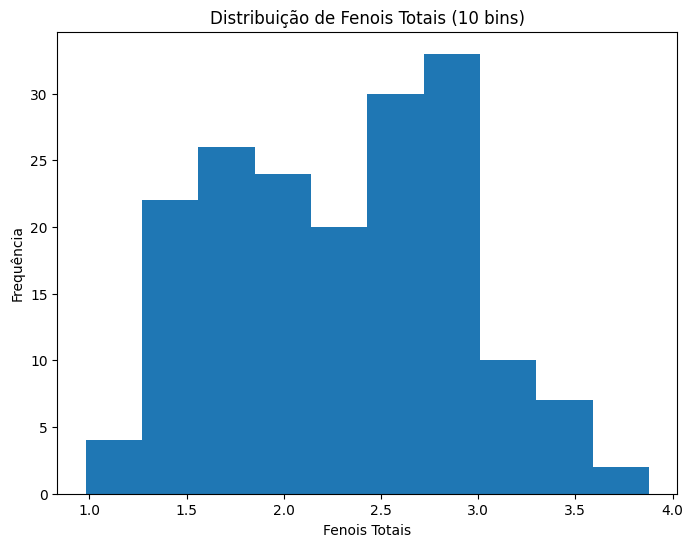

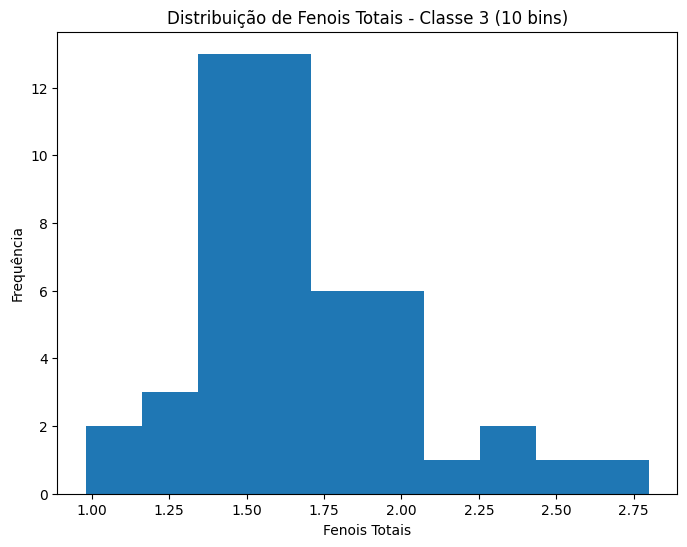

In [7]:

# Histograma para fenois_totais
plt.figure(figsize=(8, 6))
plt.hist(vinhos['fenois_totais'], bins=10)
plt.title('Distribuição de Fenois Totais (10 bins)')
plt.xlabel('Fenois Totais')
plt.ylabel('Frequência')
plt.show()

# Filtrando dados para a classe 3
vinhos_classe_3 = vinhos[vinhos['classe'] == '3']

# Histograma da classe 3 para fenois_totais
plt.figure(figsize=(8, 6))
plt.hist(vinhos_classe_3['fenois_totais'], bins=10)
plt.title('Distribuição de Fenois Totais - Classe 3 (10 bins)')
plt.xlabel('Fenois Totais')
plt.ylabel('Frequência')
plt.show()
